<a href="https://colab.research.google.com/github/OdysseusPolymetis/colabs_for_nlp/blob/main/2_analyse_textuelle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pickle
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


#**ANALYSE TEXTUELLE, LES BASES**

In [ ]:
!pip install -U spacy
!pip install stanza==1.4.0
!pip install flair
!python -m spacy download fr_dep_news_trf
!python -m spacy download fr_core_news_sm

     |████████████████████████████████| 6.2 MB 7.0 MB/s 
     |████████████████████████████████| 42 kB 1.7 MB/s 
     |████████████████████████████████| 653 kB 63.2 MB/s 
     |████████████████████████████████| 457 kB 67.9 MB/s 
     |████████████████████████████████| 181 kB 61.4 MB/s 
     |████████████████████████████████| 10.1 MB 48.5 MB/s 
     |████████████████████████████████| 58 kB 6.8 MB/s 
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.2.0
    Uninstalling typing-extensions-4.2.0:
      Successfully uninstalled typing-extensions-4.2.0
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: smart-open
    Found existing installation: smart-open 6.0.0
    U

##Qu'est-ce que c'est que l'analyse textuelle (automatique), rapidement
En fait ça peut toucher beaucoup de domaines. Ici, on va en voir plusieurs, entre autres la **tokenisation**, la **lemmatisation**, le **postagging**. J'appellerai ça les étapes de "pre-processing", de travail préliminaire.
<br>En effet, on a très souvent besoin, pour faire des choses plus poussées, de ces étapes pour éviter de créer des biais dans les analyses qui vont suivre.
<br>Voici quelques exemples de biais possibles, si l'on ne passe pas par certaines de ces étapes de pré-traitement.

Prenons l'exemple des nuages de mots. C'est globalement facile à faire, et ça permet souvent (de manière parfois un peu artificielle) d'illustrer son propos.
Ici voyons ce qu'on obtient si on fait un nuage de mots sur les _Trois Mousquetaires_.

![](https://drive.google.com/uc?export=view&id=1g8RLOXodDDGBgfR6tJ-jvVG1JHTdz65f)

Ce nuage est fait avec des données brutes. C'est-à-dire qu'on a juste injecté les mots du texte, tels quels. Globalement, on ne peut pas en faire grand chose et ce n'est pas représentatif. Pourquoi ? Déjà parce que chaque mot est encore fléchi, et donc pour chaque "fut", "est", "sera", chaque mot est compté comme un mot à part, et non comme une forme de "être".
<br>Une première solution est donc de **lemmatiser**.

![](https://drive.google.com/uc?export=view&id=10vv3sdsqLMBMXYW5-YAKp9ztgYq_sJDs)

C'est déjà mieux, mais ça n'est pas fou non plus. Il y a encore de nombreux mots dont on se fiche complètement. Exemple, "faire", "plus", etc.
<br>On a donc encore une étape, celle d'enlever les **mots-outils**, ou "stopwords", et la ponctuation. Les mots-outils sont les mots qui n'ont qu'un faible poids sémantique (qui peuvent avoir leur importance pour une étude dédiée, certes), mais qui font du bruit lors d'une analyse statistique de base.
<br>Enlevons-les.

![](https://drive.google.com/uc?export=view&id=1c9PxvrkXDTNZTC7QOGNCi2qOQ5_fI9th)

##Comment on pré-traite ?
Il y a plusieurs écoles, et donc aussi plusieurs modules pour le faire.
<br>D'expérience personnelle, il y a les modules rapides et qui donnent des résultats plus mitigés, et des modules plus longs qui sont généralement meilleurs (mais pas forcément).
<br>Ici, je vais vous montrer trois modules avec des qualités et des défauts, pour le français (mais ils ont aussi des modèles en d'autres langues).

##<center>**LE TAL : TOKENISATION, LEMMATISATION, POSTAGGING**</center>

Nous allons tester trois outils différents, qui permettent de faire ces trois actions, **`spacy`**, **`pie-extended`** et **`stanza`**. Il en existe beaucoup d'autres, mais c'est les trois que j'utilise généralement, le dernier étant le plus performant en termes de rapport qualité/temps.

##**SpaCy**
SpaCy a de nombreux modèles disponibles. Il est rapide et facilement implémentable. Vous en saurez plus [ici](https://spacy.io/usage/spacy-101).
<br>La liste des modèles de langues de SpaCy est disponible [ici](https://spacy.io/usage/models).
<br>Commençons par l'installer.

Cela fait, nous devons maintenant installer un modèle pour l'analyse du français. Il y en a plusieurs. Le plus rapide c'est "fr_core_news_sm". Le plus efficace c'est "fr_dep_news_trf". Dans la cellule du début, nous avons installé les deux.

On va maintenant importer spacy et charger le modèle `fr_dep_news_trf`. Il est nettement plus long (en temps d'exécution), attention.

In [ ]:
import spacy

In [ ]:
nlp_spacy = spacy.load("fr_dep_news_trf")

On a donc un objet analyseur, qui va disposer de nombreuses fonctions, qui s'appelle `nlp` ici.
<br>Voyons comment il se débrouille sur un passage simple.

In [ ]:
preface="Tant qu’il existera, par le fait des lois et des mœurs, une damnation sociale créant artificiellement, en pleine civilisation, des enfers, et compliquant d’une fatalité humaine la destinée qui est divine ; tant que les trois problèmes du siècle, la dégradation de l’homme par le prolétariat, la déchéance de la femme par la faim, l’atrophie de l’enfant par la nuit, ne seront pas résolus ; tant que, dans de certaines régions, l’asphyxie sociale sera possible ; en d’autres termes, et à un point de vue plus étendu encore, tant qu’il y aura sur la terre ignorance et misère, des livres de la nature de celui-ci pourront ne pas être inutiles."

In [ ]:
objet_analyse=nlp_spacy(preface)

Voilà, notre préface est analysée, voyons voir comment elle a été lemmatisée.

In [ ]:
for token in objet_analyse:
    print(token.text + ' - ' + token.lemma_)

Tant - tant
qu’ - qu’
il - il
existera - exister
, - ,
par - par
le - le
fait - fait
des - de
lois - loi
et - et
des - de
mœurs - mœur
, - ,
une - un
damnation - damnation
sociale - social
créant - créer
artificiellement - artificiellement
, - ,
en - en
pleine - plein
civilisation - civilisation
, - ,
des - un
enfers - enfer
, - ,
et - et
compliquant - compliquer
d’ - d’
une - un
fatalité - fatalité
humaine - humain
la - le
destinée - destinée
qui - qui
est - être
divine - divin
; - ;
tant - tant
que - que
les - le
trois - trois
problèmes - problème
du - de
siècle - siècle
, - ,
la - le
dégradation - dégradation
de - de
l’ - l’
homme - homme
par - par
le - le
prolétariat - prolétariat
, - ,
la - le
déchéance - déchéance
de - de
la - le
femme - femme
par - par
la - le
faim - faim
, - ,
l’ - l’
atrophie - atrophie
de - de
l’ - l’
enfant - enfant
par - par
la - le
nuit - nuit
, - ,
ne - ne
seront - être
pas - pas
résolus - résoudre
; - ;
tant - tant
que - que
, - ,
dans - dans
de - de
cer

Essayons maintenant sur un fichier plus long. Ici je télécharge le même fichier des _Misérables_.

In [ ]:
!gdown --id 1GEgd5cQoJkTm5PRWfixxOKHe3uOlxFqo

Downloading...
From: https://drive.google.com/uc?id=1GEgd5cQoJkTm5PRWfixxOKHe3uOlxFqo
To: /content/miserables.txt
100% 3.17M/3.17M [00:00<00:00, 278MB/s]


In [ ]:
filepath_of_text = "/content/miserables.txt"

In [ ]:
full_text = open(filepath_of_text, encoding="utf-8").read()

Le texte est un peu long pour la démo, donc on va n'en prendre qu'une partie (les 500000 premiers caractères, même si on peut faire plus avec une bonne GPU). Mais déjà ça va prendre un certain temps. Je vous conseille de passer les deux cellules suivantes et d'aller directement au `pickle`.

In [ ]:
miserables=nlp_spacy(full_text[:500000])

Rapidement, quand on a des calculs longs à faire et qu'on veut faire des démos live, il est bon d'utiliser `pickle` qui sauvegarde les variables dans des fichiers.

In [ ]:
pick_insert = open('/content/drive/MyDrive/Colab_Notebooks/enexdi/dumped/nlp1.pickle','wb')
pickle.dump(miserables, pick_insert)
pick_insert.close()

In [ ]:
# Si jamais vous n'avez pas envie de faire tourner le nlp de spacy, exécutez cette cellule.
pick_read = open('/content/drive/MyDrive/Colab_Notebooks/enexdi/dumped/nlp1.pickle','rb')
miserables = pickle.load(pick_read)
pick_read.close()

In [ ]:
for token in miserables[100:170]:
  if token.text!="\n":
    print(token.text + ' - ' + token.lemma_ + ' - ' + token.pos_)

qui - qui - PRON
avaient - avoir - AUX
couru - courir - VERB
sur - sur - ADP
son - son - DET
compte - compte - NOUN
au - au - ADP
moment - moment - NOUN
où - où - PRON
il - il - PRON
était - être - AUX
arrivé - arriver - VERB
dans - dans - ADP
le - le - DET
diocèse - diocèse - NOUN
. - . - PUNCT
Vrai - vrai - ADJ
ou - ou - CCONJ
faux - faux - ADJ
, - , - PUNCT
ce - ce - PRON
qu' - qu' - PRON
on - on - PRON
dit - dire - VERB
des - de - ADP
hommes - homme - NOUN
tient - tenir - VERB
souvent - souvent - ADV
autant - autant - ADV
de - de - ADP
place - place - NOUN
dans - dans - ADP
leur - leur - DET
vie - vie - NOUN
et - et - CCONJ
surtout - surtout - ADV
dans - dans - ADP
leur - leur - DET
destinée - destinée - NOUN
que - que - SCONJ
ce - ce - PRON
qu' - qu' - PRON
ils - il - PRON
font - faire - VERB
. - . - PUNCT
M. - m. - NOUN
Myriel - Myriel - PROPN
était - être - AUX
fils - fils - NOUN
d' - de - ADP
un - un - DET
conseiller - conseiller - NOUN
au - au - ADP
parlement - parlement - NOU

J'essaie maintenant avec l'autre modèle, plus rapide, la même opération. Il s'agit du modèle `fr_core_news_sm`.

In [ ]:
nlp_spacy = spacy.load("fr_core_news_sm")

In [ ]:
miserables_spacy=nlp_spacy(full_text[:500000])

Là, même pas besoin de sauvegarder, c'est très rapide.
<br>Voyons maintenant le résultat.

In [ ]:
for token in miserables_spacy[100:170]:
  if token.text!="\n":
    print(token.text + ' - ' + token.lemma_ + ' - ' + token.pos_)

qui - qui - PRON
avaient - avoir - AUX
couru - courir - VERB
sur - sur - ADP
son - son - DET
compte - compte - NOUN
au - au - ADP
moment - moment - NOUN
où - où - PRON
il - il - PRON
était - être - AUX
arrivé - arriver - VERB
dans - dans - ADP
le - le - DET
diocèse - diocèse - NOUN
. - . - PUNCT
Vrai - vrai - ADJ
ou - ou - CCONJ
faux - faux - ADJ
, - , - PUNCT
ce - ce - PRON
qu' - qu' - PRON
on - on - PRON
dit - dire - VERB
des - un - DET
hommes - homme - NOUN
tient - tenir - VERB
souvent - souvent - ADV
autant - autant - ADV
de - de - ADP
place - place - NOUN
dans - dans - ADP
leur - leur - DET
vie - vie - NOUN
et - et - CCONJ
surtout - surtout - ADV
dans - dans - ADP
leur - leur - DET
destinée - destinée - NOUN
que - que - SCONJ
ce - ce - PRON
qu' - qu' - PRON
ils - il - PRON
font - faire - VERB
. - . - PUNCT
M. - m. - NOUN
Myriel - Myriel - PROPN
était - être - AUX
fils - fils - NOUN
d' - de - ADP
un - un - DET
conseiller - conseiller - NOUN
au - au - ADP
parlement - parlement - NOU

Pas de différence notable sur ce court passage donc. Donc c'est à vous de voir selon vos besoins.

Maintenant voyons un peu d'autres analyseurs utiles. Nous allons commencer par **`pie-extended`**, qui est très bon mais un peu lent.

##**pie-extented**



C'est un module que j'aime bien, notamment parce que c'est un bon analyseur de l'ancien français, du grec et du latin. En revanche il présente beaucoup moins de fonctions que SpaCy. Donc là encore, c'est en fonction de votre usage.

##**stanza (ancien Stanford CoreNLP)**

Personnellement, c'est l'analyseur que j'utilise quand je n'ai pas besoin de faire de représentations graphiques de mes résultats. Il est rapide et efficace.

Je mentionne `stanza` en particulier pour trois raisons :
<br>- d'abord parce qu'il dispose d'un très grand nombre de modèles de langue, et pas forcément des langues très répandues,
<br>- ensuite parce qu'il est très rapide, et niveau performance tout à fait satisfaisant pour les gros corpus,
<br>- enfin parce que je le trouve facile à manipuler et à implémenter.

Mais il faut garder en tête qu'il en existe bien d'autres qui fonctionnent vraiment très bien, avec un nombre de modèles qui se multiplie. Je pense au tagger de BERT,  ou de `flair` entre autres. Mais ça nécessite d'être un peu plus aguerri.

Là encore, il existe plusieurs modèles rien que pour le français (je vous mets ici la [liste des modèles français](https://universaldependencies.org/fr/index.html), et ici la [liste des modèles](https://stanfordnlp.github.io/stanza/available_models.html) dans d'autres langues), mais le modèle par défaut peut être appelé avec `fr`.
<br>C'est un modèle sur du français moderne, donc ne fonctionne pas avec l'ancien français etc. (mais un modèle existe aussi pour l'ancien français, appelé par défaut avec `fro`).

In [ ]:
import stanza
stanza.download('fr')

2022-05-08 16:07:54 INFO: Downloading default packages for language: fr (French)...


2022-05-08 16:08:13 INFO: Finished downloading models and saved to /root/stanza_resources.


On commence par lui spécifier une Pipeline, c'est-à-dire qu'on lui signifie quels processeurs il va devoir mobiliser pour les opérations suivantes et en quelle langue. L'avantage de cette opération est qu'on ne mobilise pas l'artillerie lourde quand on veut faire des opérations simples).

In [ ]:
nlp_stanza = stanza.Pipeline(lang='fr', processors='tokenize,mwt,pos,lemma')

2022-05-08 16:11:24 INFO: Loading these models for language: fr (French):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |
| pos       | gsd     |
| lemma     | gsd     |

2022-05-08 16:11:24 INFO: Use device: gpu
2022-05-08 16:11:24 INFO: Loading: tokenize
2022-05-08 16:11:33 INFO: Loading: mwt
2022-05-08 16:11:33 INFO: Loading: pos
2022-05-08 16:11:34 INFO: Loading: lemma
2022-05-08 16:11:34 INFO: Done loading processors!


Maintenant, nous pouvons lancer le TAL sur l'ensemble du texte (il est beaucoup plus rapide que `spacy` à cet égard).

In [ ]:
miserables_stanza=nlp_stanza(full_text)

Déjà, premier constat, l'étiqueteur est plus efficace en terme de temps que `spacy` (il peut analyser l'intégralité des _Misérables_ dans un temps tout à fait correct (moins de deux minutes). Mais on va le sauvegarder quand même.

In [ ]:
pick_insert = open('/content/drive/MyDrive/Colab_Notebooks/enexdi/dumped/nlp_stanza.pickle','wb')
pickle.dump(miserables_stanza, pick_insert)
pick_insert.close()

In [ ]:
# Si jamais vous n'avez pas envie de faire tourner le nlp de stanza, exécutez cette cellule.
pick_read = open('/content/drive/MyDrive/Colab_Notebooks/enexdi/dumped/nlp_stanza.pickle','rb')
miserables_stanza = pickle.load(pick_read)
pick_read.close()

Voyons maintenant ses résultats.

In [ ]:
for sent in miserables_stanza.sentences[50:60]:
  for token in sent.words:
    print(token.text + ' - ' + token.lemma + ' - ' + token.pos)

et - et - CCONJ
, - , - PUNCT
en - en - ADP
vieillissant - vieillir - VERB
, - , - PUNCT
elle - il - PRON
avait - avoir - AUX
gagné - gagner - VERB
ce - ce - PRON
qu' - que - PRON
on - on - PRON
pourrait - pouvoir - VERB
appeler - appeler - VERB
la - le - DET
beauté - beauté - NOUN
de - de - ADP
la - le - DET
bonté - bonté - NOUN
. - . - PUNCT
Ce - ce - PRON
qui - qui - PRON
avait - avoir - AUX
été - être - AUX
de - de - ADP
la - le - DET
maigreur - maigreur - NOUN
dans - dans - ADP
sa - son - DET
jeunesse - jeunesse - NOUN
était - être - AUX
devenu - devenir - VERB
, - , - PUNCT
dans - dans - ADP
sa - son - DET
maturité - maturité - NOUN
, - , - PUNCT
de - de - ADP
la - le - DET
transparence - transparence - NOUN
; - ; - PUNCT
et - et - CCONJ
cette - ce - DET
diaphanéité - diaphanéité - NOUN
laissait - laisser - VERB
voir - voir - VERB
l' - le - DET
ange - ange - NOUN
. - . - PUNCT
C' - ce - PRON
était - être - AUX
une - un - DET
âme - âme - NOUN
plus - plus - ADV
encore - encore - AD

Globalement ça marche d'enfer. Et c'est de très loin le plus rapide (et le plus récent).

##<center>**LES ENTITES NOMMEES**</center>

Les **entités nommées** sont des éléments textuels connus et catégorisables. Par exemple, un NER (Named Entity Recognition) qui fonctionnerait bien comprendrait "la ville aux sept collines" comme un nom de lieu, et comme Rome. 

##**SpaCy**

Par défaut, quand `spacy` analyse un texte, il fait aussi la NER. Il a aussi l'avantage de disposer d'un bon module pour montrer ses résultats, à savoir `displacy`.

In [ ]:
from spacy import displacy
displacy.render(miserables_spacy[100:170], style="ent", jupyter=True)

Et voilà toutes les entités nommées de l'extrait plus long.

In [ ]:
for named_entity in miserables_spacy.ents:
  print(named_entity, named_entity.label_)

Victor Hugo

LES PER
Chapitre PER
M. Charles-François-Bienvenu Myriel PER
Digne LOC
Myriel LOC
parlement d'Aix MISC
Charles Myriel PER
traquées LOC
Charles Myriel PER
Italie LOC
M. Myriel PER
M. Myriel PER
Brignolles LOC
Paris LOC
M. le cardinal Fesch MISC
M. Myriel PER
L'empereur PER
M. Myriel PER
Digne LOC
M. PER
Myriel PER
Myriel LOC
Digne LOC
Myriel LOC
Digne LOC
Baptistine LOC
Baptistine LOC
madame Magloire PER
M. le Curé_ PER
Mademoiselle Baptistine LOC
mince LOC
vieillissant LOC
Madame Magloire PER
grasse LOC
replète LOC
M. Myriel PER
maréchal de camp PER
Chapitre II PER
Bienvenu


 PER
Digne LOC
Henri Puget PER
faculté de Paris ORG
Simore LOC
Henri Puget PER
Charles Brûlart PER
archevêque-prince d'Embrun LOC
Antoine de Mesgrigny PER
Grasse LOC
Philippe de Vendôme PER
de France LOC
abbé de
Saint-Honoré PER
Lérins LOC
François de PER
Berton de Grillon PER
évêque-baron de
Vence LOC
César de Sabran de Forcalquier PER
évêque-seigneur de Glandève LOC
Jean Soanen PER
manger-galerie du

##**stanza**

**`stanza`** aussi peut permettre de façon beaucoup plus rapide d'obtenir les NER. Ne serait-ce que parce que, par défaut, il demande de définir une Pipeline (un processus qui permet de ne pas faire toutes les opérations en même temps).

In [ ]:
stanza_ner = stanza.Pipeline(lang='fr', processors='tokenize,ner')

2022-05-06 11:16:34 WARNING: Language fr package default expects mwt, which has been added
2022-05-06 11:16:36 INFO: Loading these models for language: fr (French):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |
| ner       | wikiner |

2022-05-06 11:16:36 INFO: Use device: gpu
2022-05-06 11:16:36 INFO: Loading: tokenize
2022-05-06 11:16:36 INFO: Loading: mwt
2022-05-06 11:16:36 INFO: Loading: ner
2022-05-06 11:16:37 INFO: Done loading processors!


Je reprends le même passage que celui donné à `spacy` précédemment.

In [ ]:
doc = stanza_ner("qui avaient couru sur son compte au moment où il était arrivé dans le diocèse. Vrai ou faux, ce qu'on dit des hommes tient souvent autant de place dans leur vie et surtout dans leur destinée que ce qu'ils font. M. Myriel était fils d'un conseiller au parlement d'Aix ; noblesse de robe.")

In [ ]:
print(*[f'entity: {ent.text}\ttype: {ent.type}' for ent in doc.ents], sep='\n')

entity: Myriel	type: PER
entity: Aix	type: LOC


Les résultats sont meilleurs pour ce passage, semble-t-il.
<br>Si on fait la recherche sur l'ensemble du roman, voilà ce que stanza trouve (attention, l'exécution est un peu longue, vous avez le `pickle` deux cellules plus bas).

In [ ]:
ents_stanza = stanza_ner(full_text)

In [ ]:
pick_insert = open('/content/drive/MyDrive/Colab_Notebooks/enexdi/dumped/ents_stanza.pickle','wb')
pickle.dump(ents_stanza, pick_insert)
pick_insert.close()

In [ ]:
# Si jamais vous n'avez pas envie de faire tourner le ner de stanza, exécutez cette cellule.
pick_read = open('/content/drive/MyDrive/Colab_Notebooks/enexdi/dumped/ents_stanza.pickle','rb')
ents_stanza = pickle.load(pick_read)
pick_read.close()

In [ ]:
print(*[f'entity: {ent.text}\ttype: {ent.type}' for ent in ents_stanza.ents], sep='\n')

Streaming output truncated to the last 5000 lines.
entity: Épinal	type: LOC
entity: Bourgogne	type: LOC
entity: Liberté_	type: LOC
entity: faubourg Saint-Antoine	type: LOC
entity: faubourg Saint-Antoine	type: LOC
entity: Le coup qu'elle frappe	type: MISC
entity: Cette	type: LOC
entity: faubourg Saint-Antoine	type: LOC
entity: Paris	type: LOC
entity: Antoine_	type: PER
entity: faubourg Antoine	type: LOC
entity: Mont Aventin	type: LOC
entity: Ennius	type: PER
entity: faubourg Saint-Antoine	type: LOC
entity: Cette	type: LOC
entity: Saint-Antoine	type: PER
entity: Paris	type: LOC
entity: Moyen-Âge	type: LOC
entity: Aucune	type: LOC
entity: Dieu	type: PER
entity: Chapitre VI	type: MISC
entity: Enjolras	type: PER
entity: Enjolras	type: PER
entity: café Musain	type: LOC
entity: Enjolras	type: PER
entity: Si	type: MISC
entity: Ceux	type: LOC
entity: Cette	type: LOC
entity: Courfeyrac	type: LOC
entity: Feuilly	type: LOC
entity: la Glacière	type: LOC
entity: Combeferre	type: PER
entity: Picpus	t

Je me permets de vous montrer un autre analyseur de NER, très utilisé, globalement efficace, celui de CamemBERT. Pour le coup, si vous n'avez pas un bon ordinateur, ne pensez pas à le faire en local (il faut au moins 8G de RAM libres pour l'opération, et ça prend bien dix minutes).

Il faut effectuer un léger prétraitement : que ce soit BERT ou flair, il s'agit de NER contextuels, et il vaut mieux les faire tourner sur des phrases plutôt que sur le texte entier. Donc on va découper le texte en phrases avec `spacy`, même si vous pouvez utiliser autre chose. Pour l'occasion, comme on ne va utiliser que le tokeniseur, on peut se permettre d'augmenter la taille de RAM.

In [ ]:
nlp_spacy.disable_pipes("parser","attribute_ruler","lemmatizer","ner")
nlp_spacy.enable_pipe("senter")
nlp_spacy.max_length = 3500000

In [ ]:
sents = nlp_spacy(full_text)

In [ ]:
sentences = [sent.text for sent in sents.sents]
print(len(sentences))

28215


In [ ]:
pick_insert = open('/content/drive/MyDrive/Colab_Notebooks/enexdi/dumped/sents_spacy.pickle','wb')
pickle.dump(sents, pick_insert)
pick_insert.close()

In [ ]:
# Si jamais vous n'avez pas envie de faire tourner le sentencizer de spacy, exécutez cette cellule.
pick_read = open('/content/drive/MyDrive/Colab_Notebooks/enexdi/dumped/sents_spacy.pickle','rb')
sents = pickle.load(pick_read)
pick_read.close()

##**CamemBERT**

In [ ]:
from transformers import AutoTokenizer, AutoModelForTokenClassification

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("Jean-Baptiste/camembert-ner-with-dates")
model = AutoModelForTokenClassification.from_pretrained("Jean-Baptiste/camembert-ner-with-dates")

In [ ]:
from transformers import pipeline
nlp_bert = pipeline('ner', model=model, tokenizer=tokenizer, aggregation_strategy="simple")

In [ ]:
miserables_bert = list()
for sent in sentences[3:30]:
  miserables_bert.append(nlp_bert(sent))

In [ ]:
pick_insert = open('/content/drive/MyDrive/Colab_Notebooks/enexdi/dumped/ents_bert.pickle','wb')
pickle.dump(miserables_bert, pick_insert)
pick_insert.close()

In [ ]:
# Si jamais vous n'avez pas envie de faire tourner les ents de BERT, exécutez cette cellule.
pick_read = open('/content/drive/MyDrive/Colab_Notebooks/enexdi/dumped/ents_bert.pickle','rb')
miserables_bert = pickle.load(pick_read)
pick_read.close()

In [ ]:
print(*[ent for ent in miserables_bert], sep='\n')

[]
[{'entity_group': 'PER', 'score': 0.9912176, 'word': 'Myriel', 'start': 2, 'end': 9}, {'entity_group': 'LOC', 'score': 0.99181056, 'word': "d'Aix", 'start': 49, 'end': 55}]
[]
[{'entity_group': 'PER', 'score': 0.98767823, 'word': 'Charles Myriel', 'start': 0, 'end': 14}]
[]
[]
[{'entity_group': 'MISC', 'score': 0.6884042, 'word': 'La révolution', 'start': 0, 'end': 13}]
[{'entity_group': 'PER', 'score': 0.9957426, 'word': 'Charles Myriel', 'start': 2, 'end': 17}, {'entity_group': 'LOC', 'score': 0.97902876, 'word': 'Italie', 'start': 69, 'end': 76}]
[]
[]
[{'entity_group': 'PER', 'score': 0.5207511, 'word': 'M', 'start': 45, 'end': 47}, {'entity_group': 'PER', 'score': 0.9803947, 'word': 'Myriel', 'start': 48, 'end': 55}]
[{'entity_group': 'DATE', 'score': 0.99280024, 'word': '93', 'start': 106, 'end': 109}]
[]
[]
[{'entity_group': 'LOC', 'score': 0.98139596, 'word': "d'Italie", 'start': 49, 'end': 58}, {'entity_group': 'DATE', 'score': 0.9959462, 'word': 'En 1804', 'start': 77, 'en

##**Flair**

In [ ]:
from flair.data import Sentence
from flair.models import SequenceTagger

In [ ]:
tagger = SequenceTagger.load("flair/ner-french")

2022-05-06 12:34:25,559 loading file /root/.flair/models/ner-french/7363c68d2342aef796cf73c7a5a598c2786b051a5bcbd1152d32e6a100b63ce9.203314314706e4ef730093277621572fc37d926fdf95f0c7623c840ff4ac664c
2022-05-06 12:34:58,317 SequenceTagger predicts: Dictionary with 20 tags: <unk>, O, B-LOC, E-LOC, S-LOC, B-MISC, E-MISC, B-PER, E-PER, S-PER, I-MISC, I-PER, I-LOC, S-MISC, B-ORG, E-ORG, I-ORG, S-ORG, <START>, <STOP>


In [ ]:
for sent in sentences[3:30]:
  sentence = Sentence(sent)
  tagger.predict(sentence)
  for entity in sentence.get_spans('ner'):
    print(entity)

Span[0:3]: "Vrai ou faux" → MISC (0.473)
Span[2:3]: "Myriel" → PER (0.9932)
Span[0:2]: "Charles Myriel" → PER (0.6622)
Span[0:2]: "La révolution" → MISC (0.7066)
Span[1:3]: "Charles Myriel" → PER (0.7325)
Span[14:15]: "Italie" → LOC (0.9532)
Span[0:2]: "Sa femme" → PER (0.6132)
Span[8:9]: "M" → PER (0.6068)
Span[10:11]: "Myriel" → PER (0.4163)
Span[19:21]: "M. Myriel" → PER (0.9114)
Span[24:25]: "Brignolles" → LOC (0.9926)
Span[33:34]: "Paris" → LOC (0.9949)
Span[11:12]: "M." → PER (0.9706)
Span[13:15]: "cardinal Fesch" → PER (0.868)
Span[30:31]: "Napoléon" → PER (0.7443)
Span[1:2]: "Sire" → PER (0.9255)
Span[4:5]: "M" → PER (0.9377)
Span[6:7]: "Myriel" → PER (0.8016)
Span[6:7]: "L'empereur" → PER (0.227)
Span[25:26]: "M" → PER (0.9402)
Span[27:28]: "Myriel" → PER (0.981)
Span[37:38]: "Digne" → LOC (0.5772)
Span[60:61]: "M" → PER (0.7252)
Span[62:63]: "Myriel" → PER (0.5756)
Span[7:8]: "Myriel" → PER (0.8869)
Span[13:14]: "Myriel" → PER (0.8797)
Span[30:31]: "Digne" → LOC (0.9135)
Span

#**EN APARTE : POURQUOI L'XML/TEI ENRICHI EST UN TRÉSOR QUAND ON EN A**

Ici je vais vous montrer (rapidement) à quel point il est facile de réexploiter un XML correct et riche.
<br>Je vais partir d'un XML tiré de Frantext qui est une énorme base de données avec des XML/TEI taggés.

In [5]:
from lxml import etree as ET
import string
import sys

In [33]:
!gdown --id 1YWZPfc0PINJ0HpYp8HkqAuDZVsts8ikl
!gdown --id 1Qrppa0yYebFUVLEpnp58M86B8J3rwOVV

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1YWZPfc0PINJ0HpYp8HkqAuDZVsts8ikl
To: /content/stopwords.txt
100% 4.65k/4.65k [00:00<00:00, 8.46MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Qrppa0yYebFUVLEpnp58M86B8J3rwOVV
To: /content/le_rouge_et_le_noir.xml
100% 9.01M/9.01M [00:00<00:00, 233MB/s]


In [34]:
stopwords=list()
stop = open("/content/stopwords.txt", 'r')
for word in stop.read().split(" "):
    stopwords.append(word)

In [8]:
rouge_et_noir = "/content/le_rouge_et_le_noir.xml"

In [16]:
def strip_ns_prefix(tree):
    for element in tree.xpath('descendant-or-self::*'):
        if element.prefix:
            element.tag = ET.QName(element).localname
    return tree

In [35]:
tree = ET.parse(rouge_et_noir)
root = strip_ns_prefix(tree.getroot())
elems = root.findall(".//wf[@lemma]")
words = list()
for elem in elems:
    if elem.attrib["lemma"] not in string.punctuation and elem.attrib["lemma"] not in stopwords and "&quot;" not in elem.attrib["lemma"]:
        words.append(elem.attrib["lemma"])

In [10]:
!pip install wordcloud

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [36]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(" ".join(words))

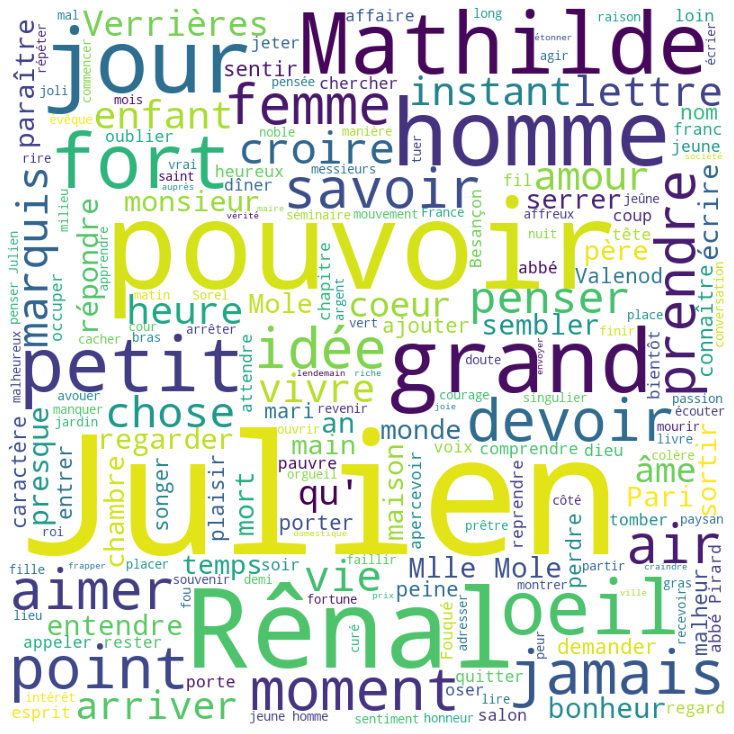

In [37]:
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import networkx as nx

In [61]:
names = set()
words = list()
for elem in elems:
    if elem.attrib["lemma"] not in string.punctuation and elem.attrib["lemma"] not in stopwords and "&quot;" not in elem.attrib["lemma"]:
        words.append(elem.attrib["lemma"].lower())
for elem in elems:
    if elem.attrib["lemma"] not in string.punctuation and elem.attrib["lemma"] not in stopwords and "&quot;" not in elem.attrib["lemma"] and elem.attrib["pos"]=="NP":
        names.add(elem.attrib["lemma"].lower())

In [62]:
voc = dict()
i=0
for name in names :
    voc[name]=i
    i+=1
print(voc)

{'brantôme': 0, 'quelle': 1, 'aiguillon': 2, 'gustave': 3, 'rome': 4, 'chélan': 5, 'tanbeau': 6, 'condé': 7, 'kléber': 8, 'antibes': 9, 'béranger': 10, 'borgo': 11, 'lachaise': 12, 'bertuccio': 13, 'moscou': 14, 'charles ix': 15, 'vienne': 16, 'besançon': 17, 'binet': 18, 'delille': 19, 'chelles': 20, 'lowe': 21, 'montmirail': 22, 'jeune': 23, 'staub': 24, 'frilair': 25, 'adolphe': 26, 'demi-ultra': 27, 'arsène': 28, 'mozart': 29, 'vendée': 30, 'sainclair': 31, 'charmier': 32, 'elle': 33, 'en': 34, 'bruxelles': 35, 'ducrest': 36, 'italie': 37, 'smollett': 38, 'rhin': 39, 'hume': 40, 'boniface': 41, 'calais': 42, 'hernani': 43, 'charles x': 44, 'beaujolais': 45, 'diane': 46, 'rotrou': 47, 'héloïse': 48, 'pichegru': 49, 'feretrius': 50, 'suresnes': 51, 'grogeot': 52, 'luther': 53, 'alembert': 54, 'chaulnes': 55, 'manuel': 56, 'baylen': 57, 'autriche': 58, 'constantin': 59, 'une': 60, 'delavigne': 61, 'marseille': 62, 'cathelineau': 63, 'gabrielle': 64, 'geronimo': 65, 'alexandre': 66, 'c

In [63]:
print(words[:30])

['livre', 'chapitre', '1', 'une', 'petit', 'ville', 'petit', 'ville', 'verrières', 'pouvoir', 'de le', 'joli', 'franche-comté', 'maison', 'blanc', 'toit', 'pointu', 'tuile', 'rouge', 'étendre', 'pente', 'colline', 'touffe', 'vigoureux', 'châtaignier', 'marquer', 'moindre', 'sinuosité', 'doubs', 'couler']


In [64]:
cv = CountVectorizer(ngram_range=(1,1), vocabulary=voc)

In [65]:
def chunking(l, n):
    for i in range(0, len(l), n):
        yield l[i:i+n]

In [66]:
bits=chunking(words,100)
sublists=[' '.join(sub_list) for sub_list in bits]

In [67]:
print(bits)
print(sublists)
print(names)

<generator object chunking at 0x7f149768af50>
['livre chapitre 1 une petit ville petit ville verrières pouvoir de le joli franche-comté maison blanc toit pointu tuile rouge étendre pente colline touffe vigoureux châtaignier marquer moindre sinuosité doubs couler centaine pied au-dessous fortification bâter jadis espagnol ruiner verrier abriter de le côté de le nord montagne de le branche de le jura cime briser de le verra couvrir neige froid octobre torrent précipiter montagne traverser verrières jeter doubs mouvement grand nombre scie bois industrie fort simple procurer bien-être majeure partie de le habitant paysan bourgeois scie bois enrichir petit ville fabrique de le toile peindre mulhouse devoir aisance général chute napoléon rebâtir façade presque maison verrières', 'peine ville étourdir fracas machine bruyant terrible apparence marteau pesant retomber bruit trembler pavé élever roue eau de le torrent mouvoir marteau fabrique jour savoir millier clou jeûne fille frais joli prése

In [68]:
X = cv.fit_transform(sublists)
Xc = (X.T * X)
Xc.setdiag(0)

/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [1]:
cols = cv.get_feature_names_out()
df = pd.DataFrame(data = Xc.toarray(), columns = cols, index = cols)

NameError: ignored

In [70]:
df

,brantôme,quelle,aiguillon,gustave,rome,chélan,tanbeau,condé,kléber,antibes,...,s',babylone,félix,marquinot,danton,buonaparté,virgile,munster,alacoque,louise
brantôme,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
quelle,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aiguillon,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
gustave,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
rome,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
buonaparté,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
virgile,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
munster,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
alacoque,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Graph with 406 nodes and 3871 edges


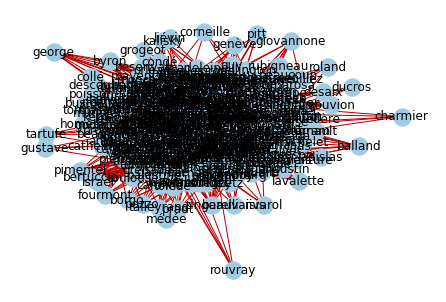

In [78]:
G = nx.Graph()
G = nx.from_pandas_adjacency(df)
nx.draw_kamada_kawai(G, with_labels=True, node_color='#A0CBE2',edge_color='#BB0000')
print(nx.info(G))